### Reconhecimento

In [1]:
from PIL import Image
import cv2
import numpy as np
import os

In [2]:
imagem = '../ArquivosBase/Yale/train'

In [4]:
def get_image_data():
  paths = [os.path.join('../ArquivosBase/Yale/train', f) for f in os.listdir('../ArquivosBase/Yale/train')]
  #print(paths)
  faces = []
  ids = []
  for path in paths:
    #print(path)
    imagem = Image.open(path).convert('L')
    #print(type(imagem))
    imagem_np = np.array(imagem, 'uint8')
    #print(type(imagem_np))
    #print(os.path.split(path)[1])
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)
    
  return np.array(ids), faces

In [5]:
ids, faces = get_image_data()

In [6]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)
lbph_classifier.train(faces, ids)
#lbph_classifier.write('lbph_classifier.yml')

In [7]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('./lbph_classifier.yml')

In [8]:
imagem_teste = '../ArquivosBase/Yale/test/subject10.sad.gif'

In [9]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [10]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 36.84750735484425)

In [11]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

In [14]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.imshow('',imagem_np)
cv2.waitKey()

-1

In [16]:
paths = [os.path.join('../ArquivosBase/Yale/test/', f) for f in os.listdir('../ArquivosBase/Yale/test/')]
previsoes = []
saidas_esperadas = []
for path in paths:
  #print(path)
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [17]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

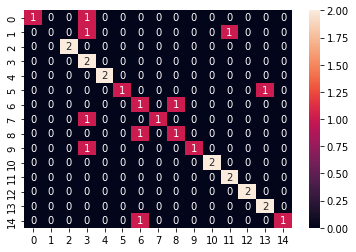

In [20]:
import seaborn
seaborn.heatmap(cm, annot=True);

In [ ]:
import dlib